In [58]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [59]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [60]:
root_paths=[
    '../results/sw/sw_SINRv11_default_NeuralODE_no_exp_none_none',
    '../results/sw/sw_SINRv11_default_NeuralODE_no_exp_scalar_default',
    '../results/sw_offgrid/sw_offgrid_SINRv11_default_NeuralODE_no_exp_none_none',
    '../results/sw_offgrid/sw_offgrid_SINRv11_default_NeuralODE_no_exp_scalar_default',
]

In [61]:

import glob

df_list=[]

for root_path in root_paths:
    if 'offgrid' in root_path:
        for f in glob.glob(root_path + "/*dataframe.pkl"):
            df = pd.read_pickle(f)
            df['offgrid'] = True
            df_list.append(df)
    else:
        for f in glob.glob(root_path + "/*dataframe.pkl"):
            df = pd.read_pickle(f)
            df['offgrid'] = False
            df_list.append(df)

df=pd.concat(df_list, ignore_index=True)

df

,kf_name,step,feature_idx,rmse,ed_name,ld_name,ue_name,ens_num,infl,sigma_z_b,sigma_m,offgrid
0,EnKF,0,0,0.019869,SINRv11_default,NeuralODE_no_exp,none_none,64,1.02,0.03,0.0001,False
1,EnKF,0,1,0.076272,SINRv11_default,NeuralODE_no_exp,none_none,64,1.02,0.03,0.0001,False
2,EnKF,1,0,0.019143,SINRv11_default,NeuralODE_no_exp,none_none,64,1.02,0.03,0.0001,False
3,EnKF,1,1,0.072518,SINRv11_default,NeuralODE_no_exp,none_none,64,1.02,0.03,0.0001,False
4,EnKF,2,0,0.019852,SINRv11_default,NeuralODE_no_exp,none_none,64,1.02,0.03,0.0001,False
...,...,...,...,...,...,...,...,...,...,...,...,...
487545,ETKF-Q,196,1,0.104536,SINRv11_default,NeuralODE_no_exp,scalar_default,32,1.10,0.10,NaN,True
487546,ETKF-Q,197,0,0.048914,SINRv11_default,NeuralODE_no_exp,scalar_default,32,1.10,0.10,NaN,True
487547,ETKF-Q,197,1,0.104861,SINRv11_default,NeuralODE_no_exp,scalar_default,32,1.10,0.10,NaN,True
487548,ETKF-Q,198,0,0.049726,SINRv11_default,NeuralODE_no_exp,scalar_default,32,1.10,0.10,NaN,True


# Renaming

In [62]:
df[df == 'SINRv11_default'] = 'SINR'
df[df == 'NeuralODE_no_exp'] = '+NeuralODE'
df[df == 'none_none'] = ''
df[df == 'scalar_default'] = '+scalar'

In [63]:
df['model'] = df['ed_name'] + df['ld_name'] + df['ue_name']

# df['model'] = df['ed_name'] + '+' + df['ld_name'] + '+' + df['ue_name']
# df[df == 'CAE+ReZero+none'] = 'CAE+ReZero'
# df[df == 'SINR+NeuralODE+none'] = 'SINR+NeuralODE (LAINR, ours)'
# df[df == 'SINR+NeuralODE+diagonal'] = 'SINR+NeuralODE w/ est. (LAINR, ours)'
df.drop(columns=['ed_name', 'ld_name', 'ue_name'], inplace=True)
print('#trajs:', len(df) / 199 / 2)
df

#trajs: 1225.0


,kf_name,step,feature_idx,rmse,ens_num,infl,sigma_z_b,sigma_m,offgrid,model
0,EnKF,0,0,0.019869,64,1.02,0.03,0.0001,False,SINR+NeuralODE
1,EnKF,0,1,0.076272,64,1.02,0.03,0.0001,False,SINR+NeuralODE
2,EnKF,1,0,0.019143,64,1.02,0.03,0.0001,False,SINR+NeuralODE
3,EnKF,1,1,0.072518,64,1.02,0.03,0.0001,False,SINR+NeuralODE
4,EnKF,2,0,0.019852,64,1.02,0.03,0.0001,False,SINR+NeuralODE
...,...,...,...,...,...,...,...,...,...,...
487545,ETKF-Q,196,1,0.104536,32,1.10,0.10,NaN,True,SINR+NeuralODE+scalar
487546,ETKF-Q,197,0,0.048914,32,1.10,0.10,NaN,True,SINR+NeuralODE+scalar
487547,ETKF-Q,197,1,0.104861,32,1.10,0.10,NaN,True,SINR+NeuralODE+scalar
487548,ETKF-Q,198,0,0.049726,32,1.10,0.10,NaN,True,SINR+NeuralODE+scalar


In [64]:
df['sigma_z_b'].fillna(-1, inplace=True)
df['sigma_m'].fillna(-1, inplace=True)
df_grouped = df.groupby(['ens_num', 'model', 'infl', 'sigma_z_b', 'sigma_m', 'kf_name', 'offgrid'])['rmse'].mean()
print('trajs:', len(df) / 199 / 2)
print(f'{len(df_grouped)=}')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_grouped)
# df

trajs: 1225.0
len(df_grouped)=1225
ens_num  model                  infl  sigma_z_b  sigma_m  kf_name  offgrid
32       SINR+NeuralODE         1.02   0.01       0.0001  DEnKF    False      0.058457
                                                          ETKF     False      0.061854
                                                          ETKF-Q   False      0.062078
                                                          EnKF     False      0.062354
                                                          SEnKF    False      0.069903
                                                  0.0003  DEnKF    False      0.057529
                                                          ETKF     False      0.061964
                                                          ETKF-Q   False      0.061127
                                                          EnKF     False      0.061720
                                                          SEnKF    False      0.069887
                    

In [65]:
df_avg_rmse = df_grouped.reset_index()
with pd.option_context('display.max_rows', 30, 'display.max_columns', None):
    display(df_avg_rmse)


,ens_num,model,infl,sigma_z_b,sigma_m,kf_name,offgrid,rmse
0,32,SINR+NeuralODE,1.02,0.01,0.0001,DEnKF,False,0.058457
1,32,SINR+NeuralODE,1.02,0.01,0.0001,ETKF,False,0.061854
2,32,SINR+NeuralODE,1.02,0.01,0.0001,ETKF-Q,False,0.062078
3,32,SINR+NeuralODE,1.02,0.01,0.0001,EnKF,False,0.062354
4,32,SINR+NeuralODE,1.02,0.01,0.0001,SEnKF,False,0.069903
...,...,...,...,...,...,...,...,...
1220,64,SINR+NeuralODE+scalar,1.10,0.10,-1.0000,ETKF-Q,True,0.053542
1221,64,SINR+NeuralODE+scalar,1.10,0.10,-1.0000,EnKF,False,0.058003
1222,64,SINR+NeuralODE+scalar,1.10,0.10,-1.0000,EnKF,True,0.057330
1223,64,SINR+NeuralODE+scalar,1.10,0.10,-1.0000,SEnKF,False,0.065859


In [66]:
df_avg_rmse['kf_id'] = df_avg_rmse['kf_name'].map({
    'EnKF': 0,
    'SEnKF': 1,
    'DEnKF': 2,
    'ETKF': 3,
    'ETKF-Q': 4,
})
df_avg_rmse.sort_values(by=['kf_id'], kind='stable', inplace=True)
df_avg_rmse = df_avg_rmse.reset_index(drop=True)
with pd.option_context('display.max_rows', 50, 'display.max_columns', None):
    display(df_avg_rmse)

,ens_num,model,infl,sigma_z_b,sigma_m,kf_name,offgrid,rmse,kf_id
0,32,SINR+NeuralODE,1.02,0.01,0.0001,EnKF,False,0.062354,0
1,32,SINR+NeuralODE,1.02,0.01,0.0003,EnKF,False,0.061720,0
2,32,SINR+NeuralODE,1.02,0.01,0.0010,EnKF,False,0.060308,0
3,32,SINR+NeuralODE,1.02,0.01,0.0030,EnKF,False,0.057978,0
4,32,SINR+NeuralODE,1.02,0.01,0.0100,EnKF,False,0.071498,0
...,...,...,...,...,...,...,...,...,...
1220,64,SINR+NeuralODE+scalar,1.10,0.01,-1.0000,ETKF-Q,True,0.053378,4
1221,64,SINR+NeuralODE+scalar,1.10,0.03,-1.0000,ETKF-Q,False,0.052760,4
1222,64,SINR+NeuralODE+scalar,1.10,0.03,-1.0000,ETKF-Q,True,0.053360,4
1223,64,SINR+NeuralODE+scalar,1.10,0.10,-1.0000,ETKF-Q,False,0.052749,4


In [67]:
df_avg_rmse[df_avg_rmse['model'] == 'SINR+NeuralODE+scalar'][df['sigma_z_b'] > 0]

/tmp/ipykernel_21382/1433739621.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_avg_rmse[df_avg_rmse['model'] == 'SINR+NeuralODE+scalar'][df['sigma_z_b'] > 0]


,ens_num,model,infl,sigma_z_b,sigma_m,kf_name,offgrid,rmse,kf_id
102,32,SINR+NeuralODE+scalar,1.02,-1.00,-1.0,EnKF,False,0.058407,0
103,32,SINR+NeuralODE+scalar,1.02,0.01,-1.0,EnKF,False,0.058615,0
104,32,SINR+NeuralODE+scalar,1.02,0.01,-1.0,EnKF,True,0.059831,0
105,32,SINR+NeuralODE+scalar,1.02,0.03,-1.0,EnKF,False,0.058388,0
106,32,SINR+NeuralODE+scalar,1.02,0.03,-1.0,EnKF,True,0.059671,0
...,...,...,...,...,...,...,...,...,...
1220,64,SINR+NeuralODE+scalar,1.10,0.01,-1.0,ETKF-Q,True,0.053378,4
1221,64,SINR+NeuralODE+scalar,1.10,0.03,-1.0,ETKF-Q,False,0.052760,4
1222,64,SINR+NeuralODE+scalar,1.10,0.03,-1.0,ETKF-Q,True,0.053360,4
1223,64,SINR+NeuralODE+scalar,1.10,0.10,-1.0,ETKF-Q,False,0.052749,4


In [68]:
for offgrid in df_avg_rmse['model'].unique():
    print(offgrid)
    for column_name in ['kf_name', 'ens_num', 'infl', 'sigma_z_b', 'sigma_m', 'offgrid']:
        print(f'\t{column_name}: {df_avg_rmse[df_avg_rmse["model"]==offgrid][column_name].unique()}')

SINR+NeuralODE
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [32 64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.1   ]
	offgrid: [False  True]
SINR+NeuralODE+scalar
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [32 64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [-1.    0.01  0.03  0.1 ]
	sigma_m: [-1.]
	offgrid: [False  True]


In [69]:
df_avg_rmse = df_avg_rmse[df_avg_rmse['ens_num'] == 64]
# df_avg_rmse = df_avg_rmse[df_avg_rmse['infl'] == 1.05]

# df_avg_rmse = df_avg_rmse[df_avg_rmse['sigma_m'].apply(lambda x: x < 0 or (x > 5e-4))]
# df_avg_rmse = df_avg_rmse[df_avg_rmse['sigma_m'] > 5e-4]

bar size: 75 | SINR+NeuralODE+scalar: 4.9120e-02, ETKF-Q, sigma_z_b=-1.0, sigma_m=-1.0, infl=1.02
bar size: 47 | SINR+NeuralODE+scalar: 5.1661e-02, DEnKF, sigma_z_b=0.03, sigma_m=0.001, infl=1.02
offgrid=False
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [ 0.01  0.03  0.1  -1.  ]
	sigma_m: [ 1.e-04  3.e-04  1.e-03  3.e-03  1.e-02  3.e-02  1.e-01 -1.e+00]
offgrid=True
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.03 0.1  0.01]
	sigma_m: [ 3.e-04  1.e-03  3.e-03  1.e-02  3.e-02  1.e-01  1.e-04 -1.e+00]


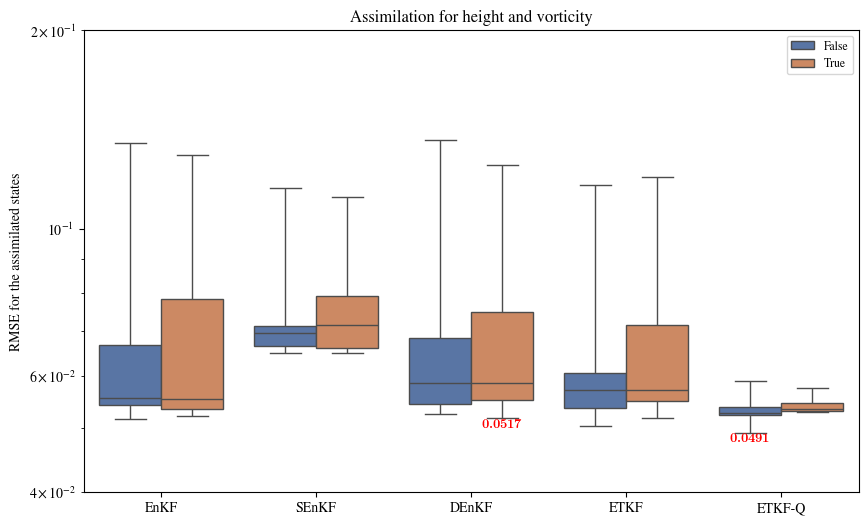

In [70]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.boxplot(df_avg_rmse, x='kf_name', y='rmse',
                 hue='offgrid', palette='deep',
                 whis=(0, 100),
                 ax=ax
                 )

ax.set_yscale('log')
ax.set_ylim(4e-2, .2)
ax.set_xlabel('')
ax.set_ylabel('RMSE for the assimilated states')
ax.set_title('Assimilation for height and vorticity')
ax.legend(fontsize='small')

# annotate the minimal value for each model
offgrids = df_avg_rmse['offgrid'].unique()
for xoffset, offgrid in zip(np.linspace(-.4 + .4 / len(offgrids), .4 - .4 / len(offgrids), len(offgrids)), offgrids):
    df_model = df_avg_rmse[df_avg_rmse['offgrid'] == offgrid]
    min_idx = df_model['rmse'].argmin()
    min_row = df_model.iloc[min_idx]
    min_value = min_row['rmse']
    x_idx = list(df_model['kf_name'].unique()).index(min_row['kf_name'])
    print('bar size:', len(df_model[df_model['kf_name'] == 'ETKF-Q']), end=' | ')
    print(
        f'{offgrid}: {min_value:.4e}, {min_row["kf_name"]}, sigma_z_b={min_row["sigma_z_b"]}, sigma_m={min_row["sigma_m"]}, infl={min_row["infl"]}')
    ax.annotate(r'\small\textbf{' + f'{min_value:.4f}' + r'}',
                xy=(x_idx + xoffset, min_value),
                xytext=(0, -.2),
                textcoords='offset points',
                ha='center', va='top', color='r',
                # weight='bold',
                usetex=True,
                # arrowprops=dict(facecolor='black', shrink=0.05),
                )

# plt.savefig('sw_assimilate_boxfig.pdf', bbox_inches='tight')

for offgrid in df_avg_rmse['offgrid'].unique():
    print(f'{offgrid=}')
    for column_name in ['kf_name', 'ens_num', 'infl', 'sigma_z_b', 'sigma_m']:
        print(f'\t{column_name}: {df_avg_rmse[df_avg_rmse["offgrid"]==offgrid][column_name].unique()}')

In [71]:
df_avg_rmse[df_avg_rmse == 'SINR+NeuralODE+scalar'] = 'SINR+NeuralODE+scalar (LAINR w/ u.e.)'
df_avg_rmse[df_avg_rmse == 'SINR+NeuralODE+diagonal'] = 'SINR+NeuralODE+diagonal (LAINR w/ u.e.)'
df_avg_rmse[df_avg_rmse == 'SINR+NeuralODE'] = 'SINR+NeuralODE (LAINR w/o u.e.)'

bar size: 63 | False: 5.0258e-02, ETKF, sigma_z_b=0.03, sigma_m=0.001, infl=1.02
bar size: 38 | True: 5.1661e-02, DEnKF, sigma_z_b=0.03, sigma_m=0.001, infl=1.02
0.05413657016864973
0.06482902339112069
0.05699614156973572
0.05514717550864022
0.0491204612967956
0.05314656545936912
0.06488649014046594
0.05662887763400473
0.05461654543932808
0.05293540188565326


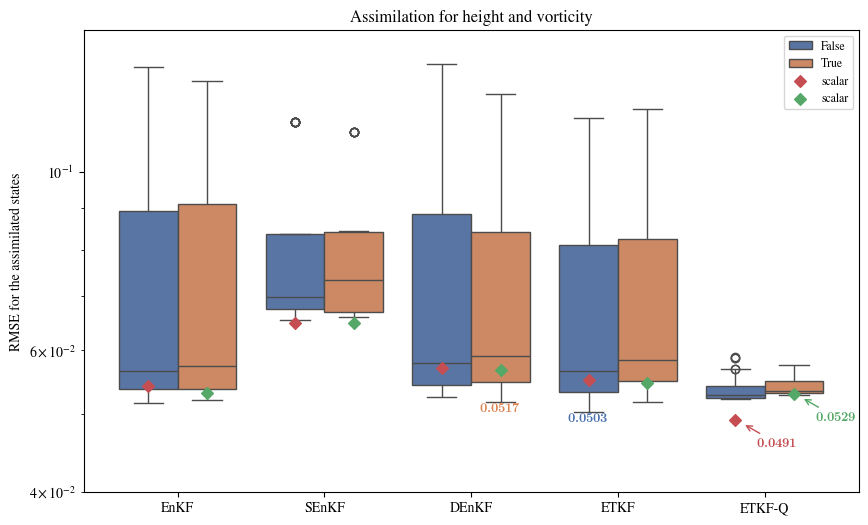

In [102]:
fig, ax = plt.subplots(figsize=(10, 6))

offgrids = [False, True]

df_box = df_avg_rmse[df_avg_rmse['sigma_m'] > 0]
df_annos = df_avg_rmse[df_avg_rmse['sigma_m'] < 0]

# df_plot[df_plot['model'] == 'SINR+NeuralODE'] = 'SINR+NeuralODE (LAINR, ours)'



palette_name = 'deep'

ax = sns.boxplot(df_box, x='kf_name', y='rmse',
                 hue='offgrid', palette=palette_name,
                 #  whis=(0, 100),
                 ax=ax
                 )

ax.set_yscale('log')
ax.set_ylim(4e-2, .15)
ax.set_xlabel('')
ax.set_ylabel('RMSE for the assimilated states')
ax.set_title('Assimilation for height and vorticity')

colors = sns.palettes.color_palette(palette_name, len(offgrids) + len(offgrids))

# annotate the minimal value for each model
for k, (xoffset, offgrid) in enumerate(zip([-.2,.2], offgrids)):
    df_model = df_box[df_box['offgrid'] == offgrid]
    min_idx = df_model['rmse'].argmin()
    min_row = df_model.iloc[min_idx]
    min_value = min_row['rmse']
    x_idx = list(df_model['kf_name'].unique()).index(min_row['kf_name'])
    print('bar size:', len(df_model[df_model['kf_name'] == 'EnKF']), end=' | ')
    print(
        f'{offgrid}: {min_value:.4e}, {min_row["kf_name"]}, sigma_z_b={min_row["sigma_z_b"]}, sigma_m={min_row["sigma_m"]}, infl={min_row["infl"]}')
    ax.annotate(r'\small\textbf{' + f'{min_value:.4f}' + r'}'                # +f'\n$\\sigma^m={min_row["sigma_m"]}$, $\\sigma_z^b={min_row["sigma_z_b"]}$'
                ,
                xy=(x_idx + xoffset, min_value),
                xytext=(0, -.2),
                textcoords='offset points',
                ha='center', va='top', color=colors[k],
                # weight='bold',
                usetex=True,
                # arrowprops=dict(facecolor='black', shrink=0.05),
                )

for k, offgrid in enumerate(offgrids):

    xlocs = []
    ylocs = []

    df_anno = df_annos[df_annos['offgrid'] == offgrid]
    # add diagonal estimator
    for xtick in ax.get_xticks():
        # idx = df[df['error']==min_value[xtick]].index.values
        df_anno_value = df_anno[df_anno['kf_name'] == df_box['kf_name'].unique()[xtick]]['rmse'].min()
        # ax.text(xtick, low_whisker - 2, text,
        #               horizontalalignment='center', size='x-small', weight='semibold')
        print(df_anno_value)
        xlocs.append(xtick - .4 + .8 / len(offgrids) / 2 + .8 / len(offgrids) * k)
        ylocs.append(df_anno_value)
        # if xtick == 0:
        #     ax.scatter(xtick + .4 - .8 / len(models) / 2, df_anno_value, marker='D',
        #             color=colors[len(colors) - k - 1], label='w/ ' + model.split('+')[-1])
        # else:
        #     ax.scatter(xtick + .4 - .8 / len(models) / 2, df_anno_value, marker='D',
        #             color=colors[len(colors) - k - 1])

    ax.scatter(
        xlocs, ylocs, marker='D', color=colors[len(colors) - k - 1], label='scalar', zorder=100)

    # add diagonal estimator minimum
    min_idx = df_anno['rmse'].argmin()
    min_row = df_anno.iloc[min_idx]
    min_value = min_row['rmse']
    min_kf_idx = list(df_anno['kf_name'].unique()).index(min_row['kf_name'])
    ax.annotate(r'\small\textbf{' + f'{min_value:.4f}' + r'}',
                xy=(min_kf_idx - .4 + .8 / len(offgrids) / 2 + .8 / len(offgrids) * k + .05, min_value*.99),
                xytext=(40, -10),
                textcoords='offset points',
                arrowprops=dict(arrowstyle="->", color=colors[len(colors) - k - 1]),
                ha='right', va='top', color=colors[len(colors) - k - 1],
                # weight='bold',
                usetex=True,
                )


ax.legend(fontsize='small')
plt.savefig('sw_assimilate_boxfig.pdf', bbox_inches='tight')

# deprecated

In [84]:
for column_name in df.columns:
    if column_name in ['ed_name', 'ld_name', 'ue_name', 'rmse']:
        continue
    print(f'{column_name}: {df[column_name].unique()}')

kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
step: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198]
feature_idx: [0 1]
ens_num: [64 32]
infl: [1.02 1.05 1.1 ]
sigma_z_b: [ 0.03  0.01  0.1  -1.  ]
sigma_m: [ 1.e-04  1.e-03  1.e-01  1.e-

In [85]:
ax = sns.boxplot(df, x='sigma_m', y='rmse',
                 hue='surrogate model', palette='deep', whis=(0, 100))

ax.set_yscale('log')
ax.set_ylim(4e-2, 1.)
ax.set_xlabel(r'$\sigma^m$', usetex=True)
ax.set_ylabel('RMSE for the assimilated states')

# annotate the minimal value for each model
for xoffset, offgrid in zip([-2, 0, 2], df['surrogate model'].unique()):
    df_model = df[df['surrogate model'] == offgrid]
    min_idx = df_model['rmse'].argmin()
    min_row = df_model.iloc[min_idx]
    min_value = min_row['rmse']
    x_idx = list(df_model['sigma_m'].unique()).index(min_row['sigma_m'])
    print(f'{offgrid}: {min_value}')
    ax.annotate(r'\underline{\textbf{'+f'{min_value:.4f}'+r'}}',
                #+f'\n{min_row["kf_name"]} with $\\sigma_z^b={min_row["sigma_z_b"]:.4f}$',
                xy=(x_idx, min_value),
                xytext=(xoffset, -.2),
                textcoords='offset fontsize',
                ha='center', va='top', color='r',
                # weight='bold',
                usetex=True,
                # arrowprops=dict(facecolor='black', shrink=0.05),
                )

# plt.savefig('sw_assimilate_boxfig.pdf', bbox_inches='tight')

ValueError: Could not interpret value `surrogate model` for `hue`. An entry with this name does not appear in `data`.

In [ ]:
ax = sns.boxplot(df, x='kf_name', y='rmse',
                 hue='surrogate model', palette='deep', whis=(0, 100))

ax.set_yscale('log')
ax.set_ylim(5e-2, 1.)
ax.set_xlabel('')
ax.set_ylabel('RMSE for the assimilated states')
ax.set_title('Assimilation for height and vorticity')
ax.legend(fontsize='small')

# annotate the minimal value for each model
for xoffset, offgrid in zip([-2, 0, 2], df['surrogate model'].unique()):
    df_model = df[df['surrogate model'] == offgrid]
    min_idx = df_model['rmse'].argmin()
    min_row = df_model.iloc[min_idx]
    min_value = min_row['rmse']
    x_idx = list(df_model['kf_name'].unique()).index(min_row['kf_name'])
    print(f'{offgrid}: {min_value}, {min_row["kf_name"]}, sigma_z_b={min_row["sigma_z_b"]}, sigma_m={min_row["sigma_m"]}')
    ax.annotate(r'\textbf{' + f'{min_value:.4f}' + r'}'
                # +f'\n$\\sigma^m={min_row["sigma_m"]}$, $\\sigma_z^b={min_row["sigma_z_b"]}$'
                ,
                xy=(x_idx, min_value),
                xytext=(xoffset, -.2),
                textcoords='offset fontsize',
                ha='center', va='top', color='r',
                # weight='bold',
                usetex=True,
                # arrowprops=dict(facecolor='black', shrink=0.05),
                )

plt.savefig('sw_assimilate_boxfig.pdf', bbox_inches='tight')

In [ ]:
ax = sns.scatterplot(df, x='sigma_m', y='rmse',
                     hue='kf_name', style='surrogate model', palette='deep')
# ax.set_yscale('log')
ax.set_xscale('log')